# <font color='mediumvioletred'> Contrast Enhancement

### <font color='crimson'> **Question 1**

<font color='mediumblue'> **Does the original image need to enhance? (use original image histogram to prove your answer)**

<font color='blueviolet'> **Answer:** <font color='navy'> Yes, based on the information provided about the original image histogram, it seems that most of the pixels have intensities between 0 and 50 *(86.60%)* .
This suggests that the image might have low contrast or is predominantly dark. Enhancing the image through techniques like contrast stretching, gamma correction, or histogram equalization can help improve visibility and details.</font>

#### Import necessary libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#### Function to read and display the original image

In [2]:
def read_and_display_image(file_path):
    img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
    show_img_plt(img, 'Original Image')

#### Display image using matplotlib

In [3]:
def show_img_plt(img, title='', c_map='gray', fig_height=8, fig_width=6):
    plt.figure(figsize=(fig_height, fig_width), dpi=100)
    plt.imshow(img, cmap=c_map)
    plt.title(title)
    plt.show()

#### Display histogram using matplotlib

In [4]:
def display_hist_plt(img, bins=256, img_range=(0, 256), title='Histogram'):
    plt.hist(img.flat, bins=bins, range=img_range)
    plt.title(title)
    plt.show()

### 1. Display Original Image and its Histogram

In [5]:
file_path = 'sample.jpg'

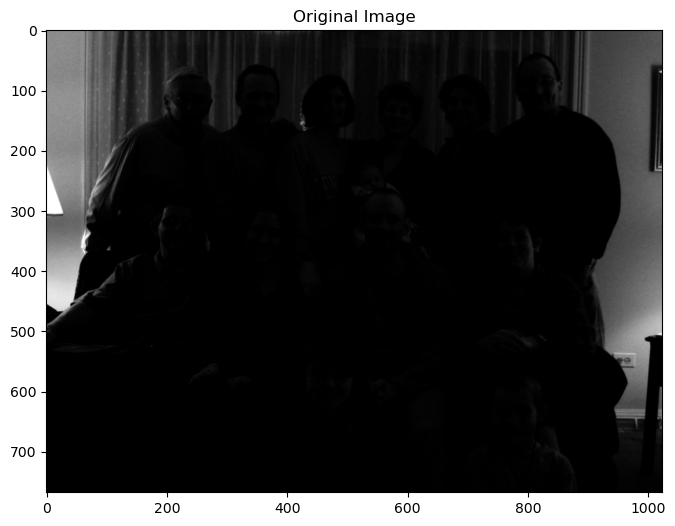

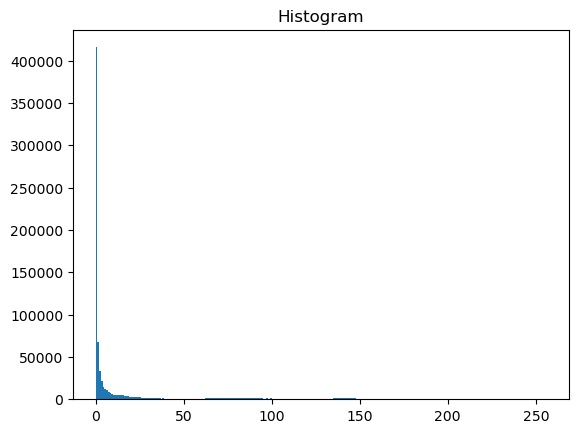

In [6]:
read_and_display_image(file_path)
display_hist_plt(cv2.imread(file_path, cv2.IMREAD_GRAYSCALE))

#### Calculate and display the percentage of pixels in the intensity range (0-50)

In [7]:
def calculate_intensity_percentage(image_path, intensity_range):
    # Read the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Count the pixels with intensity within the specified range
    pixels_in_range = cv2.inRange(image, intensity_range[0], intensity_range[1])
    
    # Calculate the total number of pixels in the image
    total_pixels = image.shape[0] * image.shape[1]
    
    # Calculate the number of pixels within the specified intensity range
    pixels_count = cv2.countNonZero(pixels_in_range)
    
    # Calculate the percentage
    percentage = (pixels_count / total_pixels) * 100
    
    return percentage

# Define the intensity range (0-50)
intensity_range = (0, 50)

In [8]:
# Calculate the percentage of pixels within the intensity range
percentage = calculate_intensity_percentage(file_path, intensity_range)

# Display the result
print(f"Percentage of pixels with intensity between {intensity_range[0]}-{intensity_range[1]}: {percentage:.2f}%")

Percentage of pixels with intensity between 0-50: 86.60%


### <font color='crimson'> **Question 2**

<font color='mediumblue'> **Enhance the original image to output image using contrast enhancement ways.**

### 2. Enhance original image using Contrast Stretching, Gamma Correction, and Histogram Equalization and Display Enhanced Images and their Histogram

#### Contrast Stretching

In [9]:
def contrast_stretching(img):
    min_val = np.min(img)
    max_val = np.max(img)
    stretched_img = 255 * ((img - min_val) / (max_val - min_val))
    return stretched_img.astype(np.uint8)

#### Gamma Correction

In [10]:
def gamma_correction(img, gamma):
    gamma_corrected_img = np.power(img / 255.0, gamma)
    return (gamma_corrected_img * 255).astype(np.uint8)

#### Histogram Equalization

In [11]:
def histogram_equalization(img):
    equalized_img = cv2.equalizeHist(img)
    return equalized_img

In [12]:
img_original = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)

#### Contrast Stretching

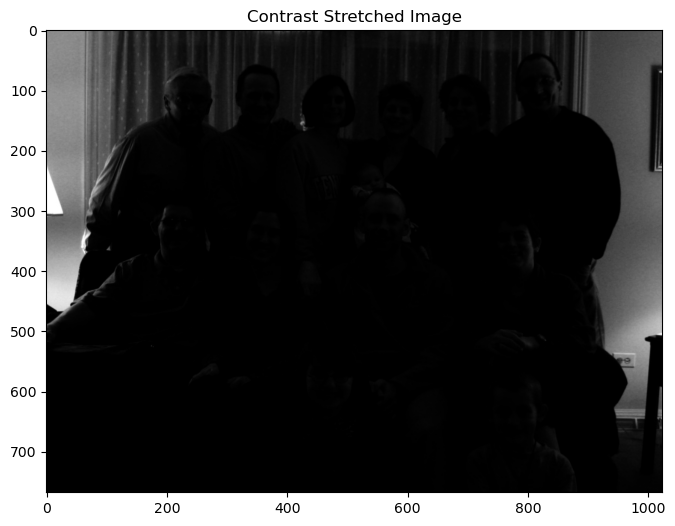

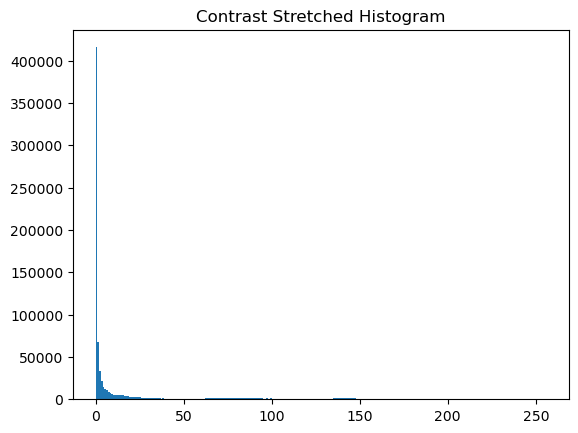

In [13]:
img_contrast_stretched = contrast_stretching(img_original)
show_img_plt(img_contrast_stretched, 'Contrast Stretched Image')
display_hist_plt(img_contrast_stretched, title='Contrast Stretched Histogram')

#### Gamma Correction

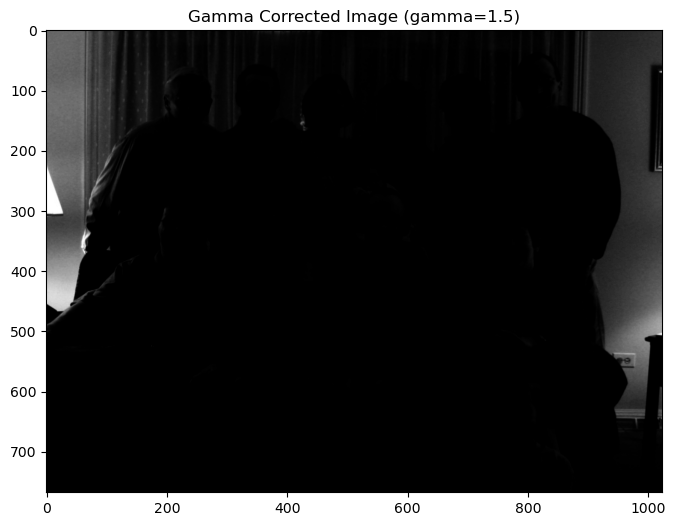

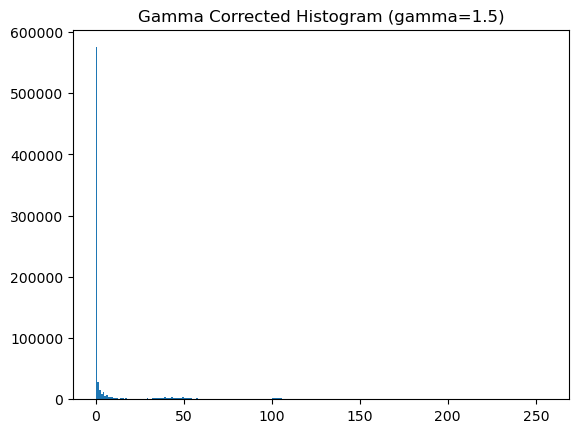

In [14]:
gamma_value = 1.5
img_gamma_corrected = gamma_correction(img_original, gamma_value)
show_img_plt(img_gamma_corrected, f'Gamma Corrected Image (gamma={gamma_value})')
display_hist_plt(img_gamma_corrected, title=f'Gamma Corrected Histogram (gamma={gamma_value})')

#### Histogram Equalization

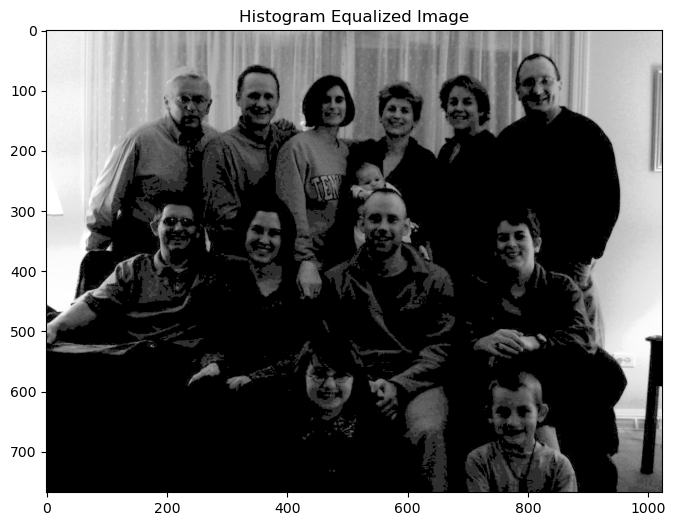

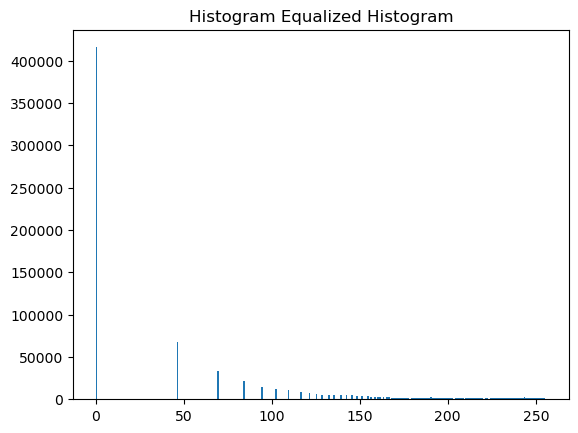

In [15]:
img_equalized = histogram_equalization(img_original)
show_img_plt(img_equalized, 'Histogram Equalized Image')
display_hist_plt(img_equalized, title='Histogram Equalized Histogram')

### <font color='crimson'> **Question 3**

<font color='mediumblue'> **Plot the output image histogram and analyse that.**

<font color='blueviolet'> **Answer:** <font color='navy'> The results from Contrast Stretching and Gamma Correction yielded unsatisfactory outcomes, showing only minimal changes in both the image and its histogram. These techniques seemed ineffective in addressing the low contrast and predominant darkness observed in the original image, where a significant portion of pixels had intensities between 0 and 50. In contrast, Histogram Equalization demonstrated a satisfactory improvement, successfully redistributing pixel intensities across the entire 0-255 range. This led to a lighter image with enhanced visibility and details, showcasing the effectiveness of Histogram Equalization in addressing the specific characteristics identified in the original image's histogram.